In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("PJ DATA 1M")

PJ DATA 1M


In [2]:
'''Objective
This project aims to analyze customer purchase behavior using real-world online retail transaction data 
and to build a predictive model to identify repeat purchase customers.
The insights from this analysis can support customer segmentation and retention strategies.'''

'Objective\nThis project aims to analyze customer purchase behavior using real-world online retail transaction data \nand to build a predictive model to identify repeat purchase customers.\nThe insights from this analysis can support customer segmentation and retention strategies.'

In [3]:
df = pd.read_csv("online_retail_II.csv")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#DATA OVERVIEW

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
#Description missing : 1067371 - 1062989 = 4382 row
#Quantity check : negative?
#InvoiceDate : change to datetime
#price check : under =< 0?
#Customer ID :float --> int

In [8]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
#Data cleansing

In [12]:
df = df.dropna(subset=['Customer ID']) # Remove transaction without Customer ID
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['Price']


In [13]:
df.shape

(805549, 9)

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [15]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,805549.000000,805549,805549.000000,805549.000000,805549.000000
mean,13.290522,2011-01-02 10:24:44.106814464,3.206561,15331.954970,22.026505
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-07-07 12:08:00,1.250000,13982.000000,4.950000
50%,5.000000,2010-12-03 15:10:00,1.950000,15271.000000,11.850000
75%,12.000000,2011-07-28 13:05:00,3.750000,16805.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000
std,143.634088,NaN,29.199173,1696.737039,224.041928


In [ ]:
'''After cleaning, the dataset contains valid 
transactional records suitable for customer-level analysis.'''

In [16]:
#EDA
df['TotalPrice'].sum()

np.float64(17743429.178000003)

In [18]:
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False).head(10)

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: TotalPrice, dtype: float64

In [ ]:
#UK highest totalprice

In [20]:
#purschase frequency per customer
customer_freq = df.groupby('Customer ID')['Invoice'].nunique()
customer_freq.describe()

count    5878.000000
mean        6.289384
std        13.009406
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       398.000000
Name: Invoice, dtype: float64

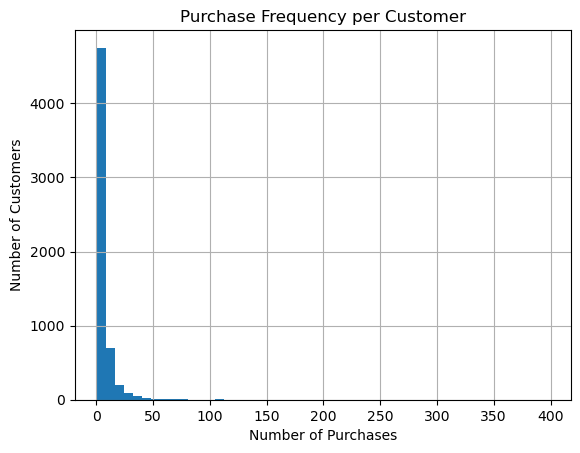

In [23]:
#plot
customer_freq.hist(bins = 50)
plt.title('Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

In [24]:
#order value distribution
order_value = df.groupby('Invoice')['TotalPrice'].sum()
order_value.describe()

count     36969.000000
mean        479.954264
std        1374.990573
min           0.380000
25%         160.800000
50%         305.250000
75%         489.260000
max      168469.600000
Name: TotalPrice, dtype: float64

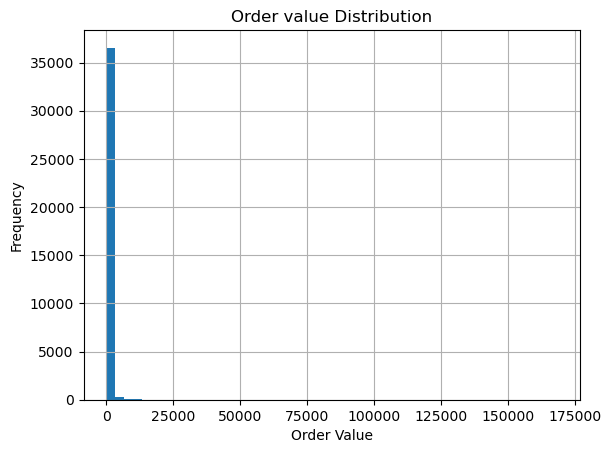

In [27]:
order_value.hist(bins = 50)
plt.title('Order value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

In [29]:
order_value.describe(percentiles=[.5, .75, .9, .95, .99])

count     36969.000000
mean        479.954264
std        1374.990573
min           0.380000
50%         305.250000
75%         489.260000
90%         851.672000
95%        1253.780000
99%        3697.918400
max      168469.600000
Name: TotalPrice, dtype: float64

In [30]:
#most revenue are from low price product

In [31]:
#RFM analysis
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days = 1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [33]:
rfm.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.331916,6.289384,3018.616737
std,209.338707,13.009406,14737.731040
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,348.762500
50%,96.000000,3.000000,898.915000
75%,380.000000,7.000000,2307.090000
max,739.000000,398.000000,608821.650000


In [35]:
#define prediction target
rfm['RepeatPurchase'] = (rfm['Frequency'] > 1).astype(int)
rfm['RepeatPurchase'].value_counts()

RepeatPurchase
1    4255
0    1623
Name: count, dtype: int64

In [36]:
df['Customer ID'].nunique()

5878

In [37]:
# 72% repeat
# 28% non repeat

In [47]:
#Model trainning(Baseline)
#Randomforest
X = rfm[['Recency', 'Monetary']]
y = rfm['RepeatPurchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, 
    random_state = 42, 
    stratify = y
)

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71       325
           1       0.88      0.91      0.90       851

    accuracy                           0.85      1176
   macro avg       0.81      0.79      0.80      1176
weighted avg       0.84      0.85      0.84      1176



In [48]:
#Feature importance

importance = pd.Series(model.feature_importances_, index = X.columns)
importance.sort_values(ascending = False)

Monetary    0.684856
Recency     0.315144
dtype: float64